In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from pandas.io.data import DataReader

C:\pythonProgramming\tools\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [7]:
from datetime import datetime

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end=datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [10]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-06-29 to 2016-06-28
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


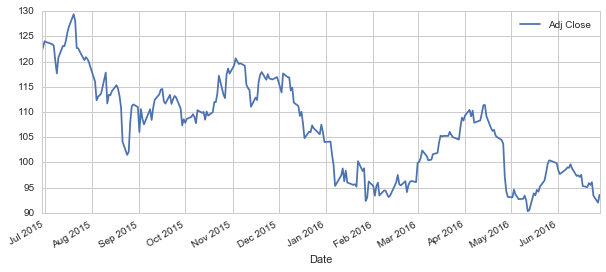

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

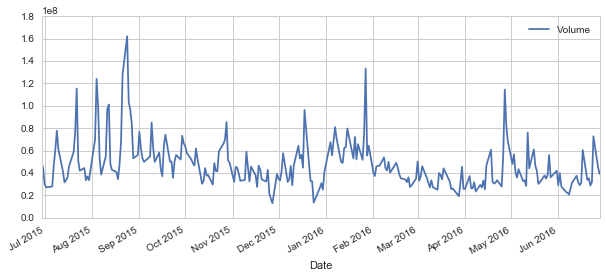

In [17]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [21]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()


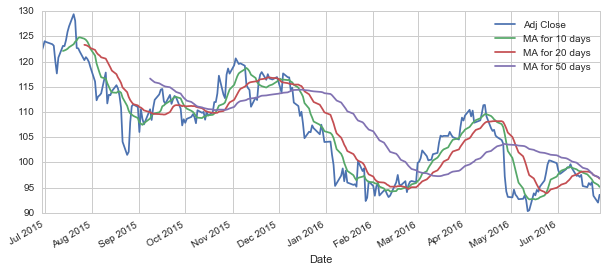

In [24]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

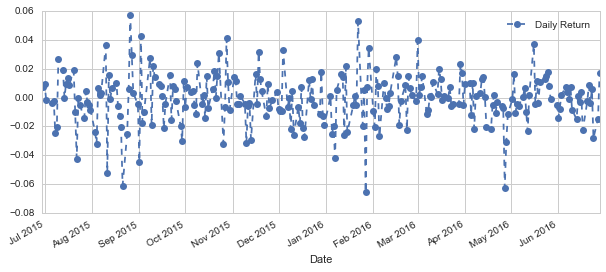

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

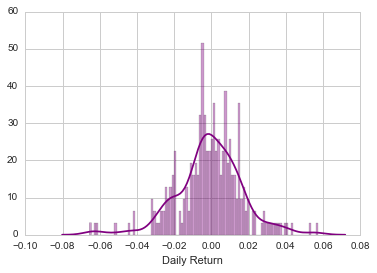

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

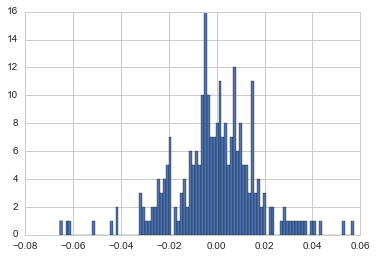

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [31]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [32]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-29,122.031281,429.859985,521.520020,43.170133
2015-06-30,122.913224,434.089996,520.510010,42.956085
2015-07-01,124.059746,437.390015,521.840027,43.247972
2015-07-02,123.902960,437.709991,523.400024,43.199325
2015-07-06,123.471786,436.040009,522.859985,43.189593


In [37]:
tech_rets =closing_df.pct_change()

In [38]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-29,NaN,NaN,NaN,NaN
2015-06-30,0.007227,0.009840,-0.001937,-0.004958
2015-07-01,0.009328,0.007602,0.002555,0.006795
2015-07-02,-0.001264,0.000732,0.002989,-0.001125
2015-07-06,-0.003480,-0.003815,-0.001032,-0.000225


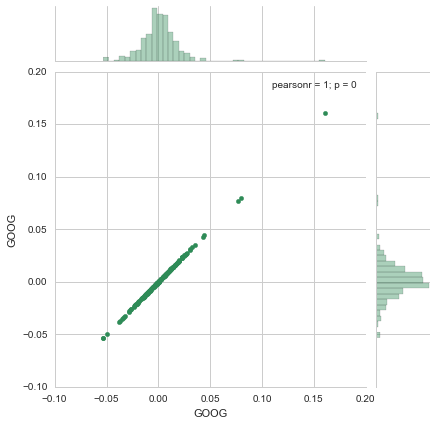

In [42]:
#
sns.jointplot('GOOG','GOOG',data=tech_rets,kind='scatter',color='seagreen')

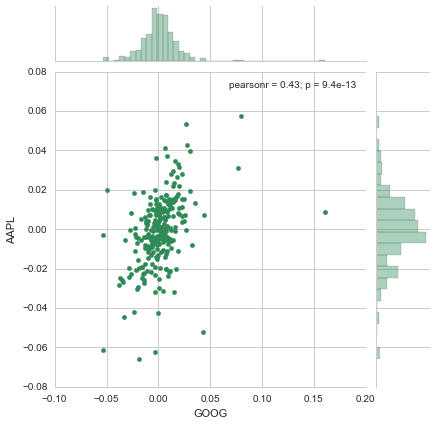

In [45]:
sns.jointplot('GOOG','AAPL',data=tech_rets,kind='scatter',color='seagreen')

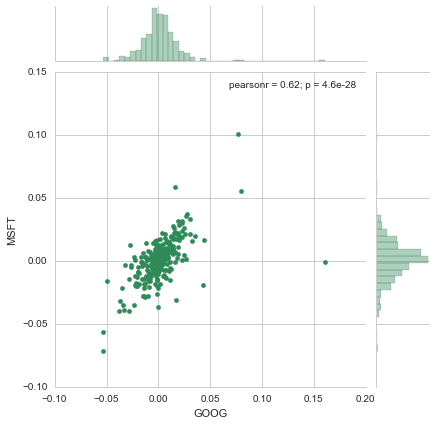

In [46]:
sns.jointplot('GOOG','MSFT',data=tech_rets,kind='scatter',color='seagreen')

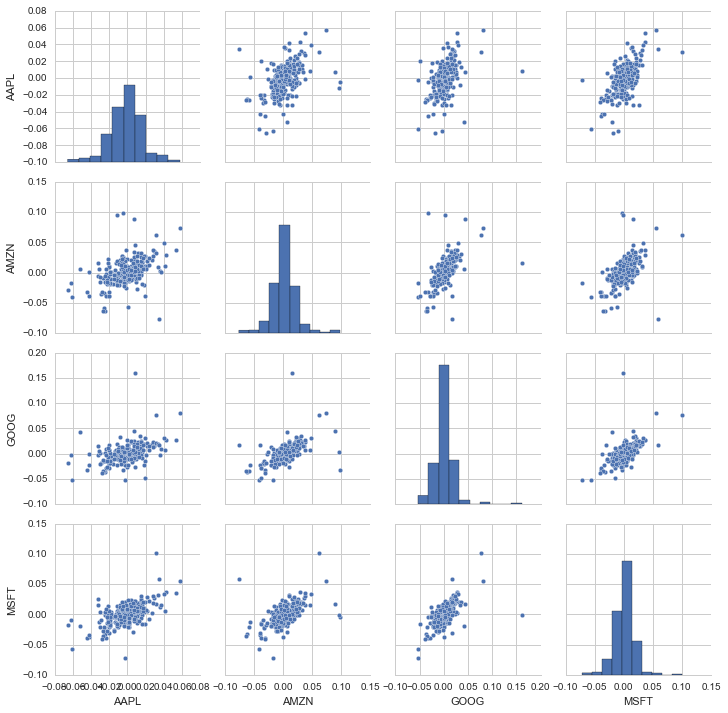

In [48]:
sns.pairplot(tech_rets.dropna())

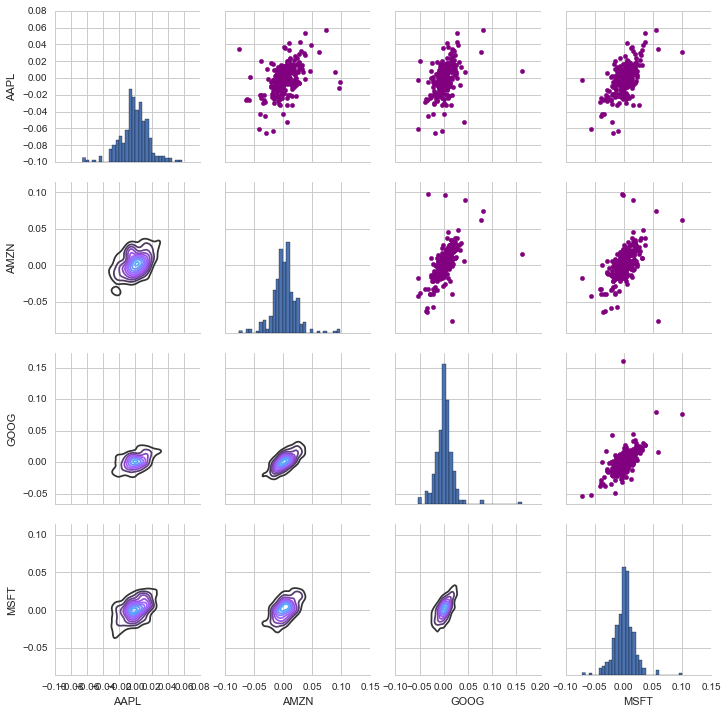

In [51]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

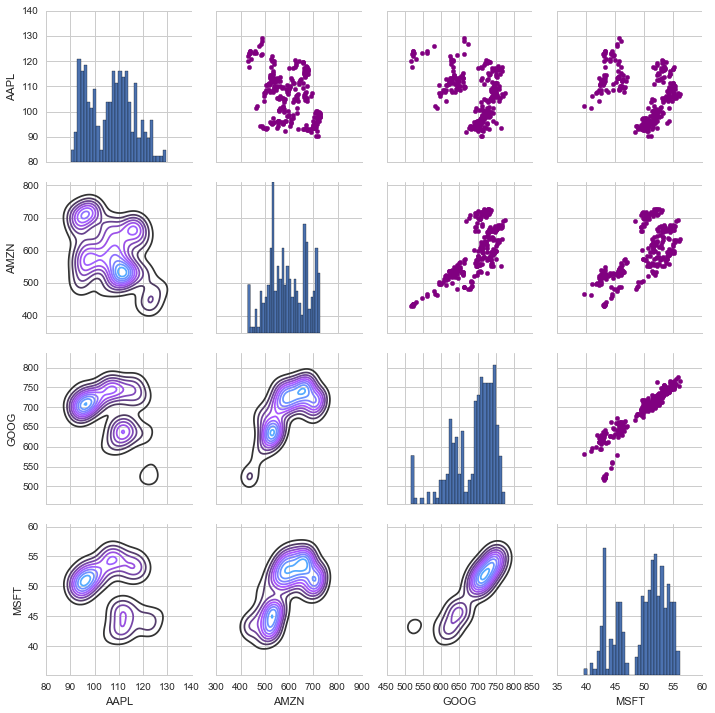

In [52]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

C:\pythonProgramming\tools\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\pythonProgramming\tools\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


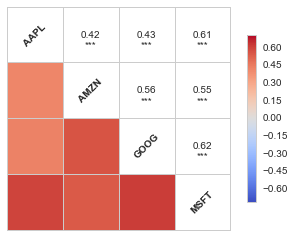

In [56]:
sns.corrplot(tech_rets.dropna(),annot=True)

C:\pythonProgramming\tools\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\pythonProgramming\tools\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


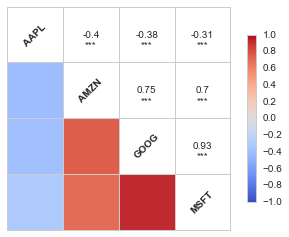

In [59]:
sns.corrplot(closing_df.dropna(),annot=True)

In [67]:
tech_rets['GOOG'].quantile(0.05)

-0.026137841516867509

In [68]:
tech_rets['AAPL'].quantile(0.05)

-0.02859644482707982

In [69]:
tech_rets['MSFT'].quantile(0.05)

-0.027999142315665727

In [70]:
tech_rets['AMZN'].quantile(0.05)

-0.032752236116991323

In [72]:
rets= tech_rets.dropna()
days=365
dt=1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [73]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu.dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price
    

In [78]:
start_price = 525.01
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel(Days)
plt.ylabel(price)
plt.title('Monte Calo Analysis for Google')

AttributeError: 'numpy.float64' object has no attribute 'dt'